In [ ]:
import torch 
import numpy as np
from PIL import Image
from skimage.io import imread, imsave
from torchvision.io import read_image
from torchvision.utils import save_image
import matplotlib.pyplot as plt

In [ ]:
input_file = "/home/mgj/workspace/img-to-img/datasets/solar_sdo/aia_dataset/train/input/2020-01-01T00:00:00_171_304.npz"
target_file = "/home/mgj/workspace/img-to-img/datasets/solar_sdo/aia_dataset/train/target/2020-01-01T00:00:00_193.npz"

In [ ]:
input_array = np.load(input_file)['data'].astype(np.float32).transpose(1, 2, 0)
target_array = np.load(target_file)['data'].astype(np.float32).transpose(1, 2, 0)
print(input_array.shape)
print(target_array.shape)

(1024, 1024, 2)
(1024, 1024, 1)


In [ ]:
print(np.max(input_array), np.min(input_array), np.mean(input_array), np.std(input_array))
print(np.max(target_array), np.min(target_array), np.mean(target_array), np.std(target_array))

0.47529712 -1.0 -0.37377492 0.38494802
0.61233795 -1.0 -0.2781815 0.34990928


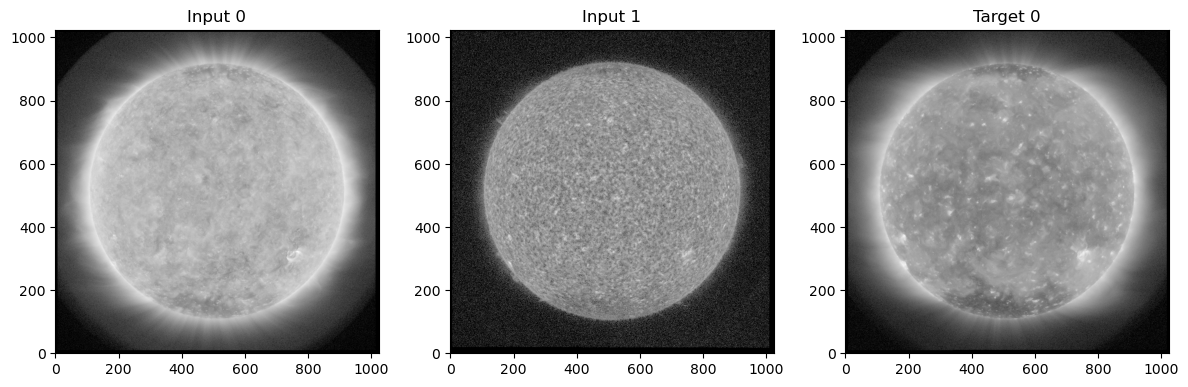

In [ ]:
in_channels = input_array.shape[-1]
out_channels = target_array.shape[-1]

cols = in_channels + out_channels
height = 4
width = cols*height

fig, axs = plt.subplots(1, cols, figsize=(width, height))
axs = axs.flatten()
for i in range(in_channels):
    axs[i].imshow(input_array[..., i], cmap="gray", origin="lower")
    # axs[i].axis("off")
    axs[i].set_title(f"Input {i}")
for i in range(out_channels):
    axs[in_channels+i].imshow(target_array[..., i], cmap="gray", origin="lower")
    # axs[in_channels+i].axis("off")
    axs[in_channels+i].set_title(f"Target {i}")
fig.tight_layout()
plt.show()

In [ ]:
import albumentations as A
from albumentations.pytorch import ToTensorV2

In [ ]:
image_size = 256

In [ ]:
transform = A.Compose([
    A.Resize(image_size, image_size),
    # A.VerticalFlip(p=1),
    ToTensorV2(),
], 
    additional_targets = {
        'image_target': 'image',
    }
)

In [ ]:
transformed = transform(image=input_array, image_target=target_array)
transformed_input_array = transformed["image"]
transformed_target_array = transformed["image_target"]
print(transformed_input_array.shape)
print(transformed_target_array.shape)

torch.Size([2, 256, 256])
torch.Size([1, 256, 256])


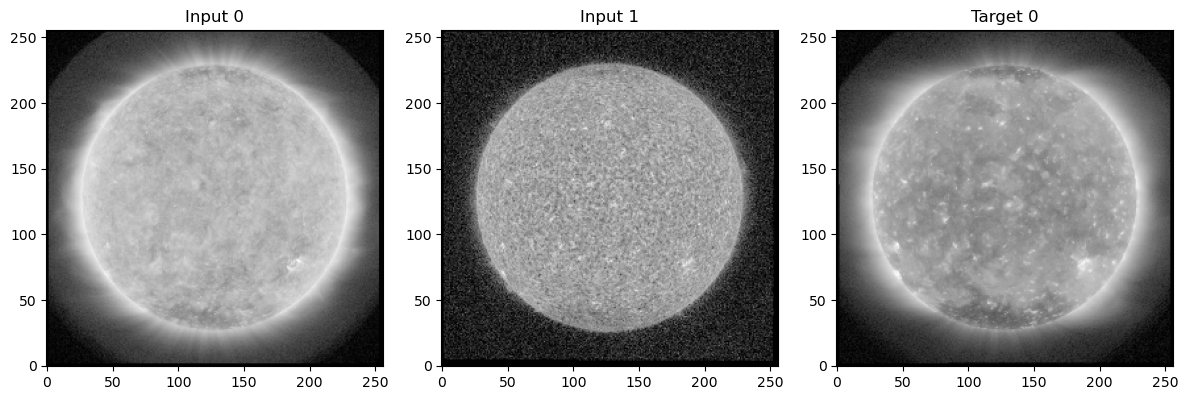

In [ ]:
in_channels = transformed_input_array.shape[0]
out_channels = transformed_target_array.shape[0]

cols = in_channels + out_channels
height = 4
width = cols*height

fig, axs = plt.subplots(1, cols, figsize=(width, height))
axs = axs.flatten()
for i in range(in_channels):
    axs[i].imshow(transformed_input_array[i], cmap="gray", origin="lower")
    # axs[i].axis("off")
    axs[i].set_title(f"Input {i}")
for i in range(out_channels):
    axs[in_channels+i].imshow(transformed_target_array[i], cmap="gray", origin="lower")
    # axs[in_channels+i].axis("off")
    axs[in_channels+i].set_title(f"Target {i}")
fig.tight_layout()
plt.show()

In [ ]:
MinVal = 0
MaxVal = 255
m = (MinVal + MaxVal) / 2
s = (MaxVal - MinVal) / 2

denorm_target_array = transformed_target_array * s + m
denorm_target_array = denorm_target_array.numpy().astype(np.uint8)
denorm_target_array = np.clip(denorm_target_array, MinVal, MaxVal)
print(np.max(denorm_target_array), np.min(denorm_target_array), np.mean(denorm_target_array), np.std(denorm_target_array))
print(denorm_target_array.shape)

197 0 91.51300048828125 44.36232779480832
(1, 256, 256)


In [ ]:
Image.fromarray(denorm_target_array[0]).save("denorm_target_array.png")